In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [2]:
# Veri setinin yüklenmesi

(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [3]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [4]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [5]:
num_label = len(np.unique(y_train))

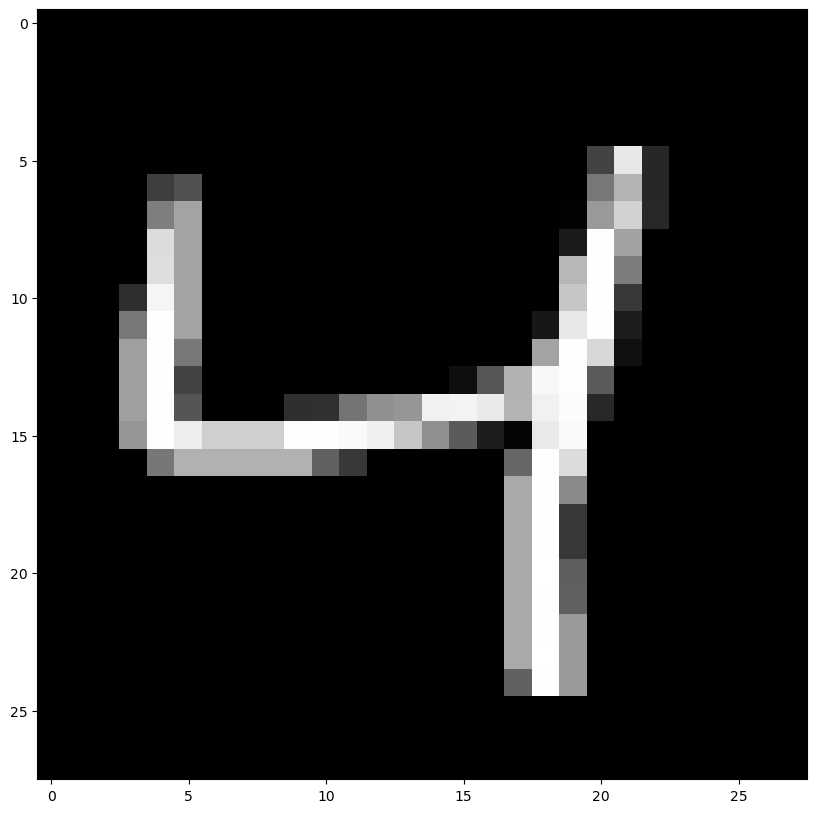

In [6]:
# Veri setinin Örnek Gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap="gray")

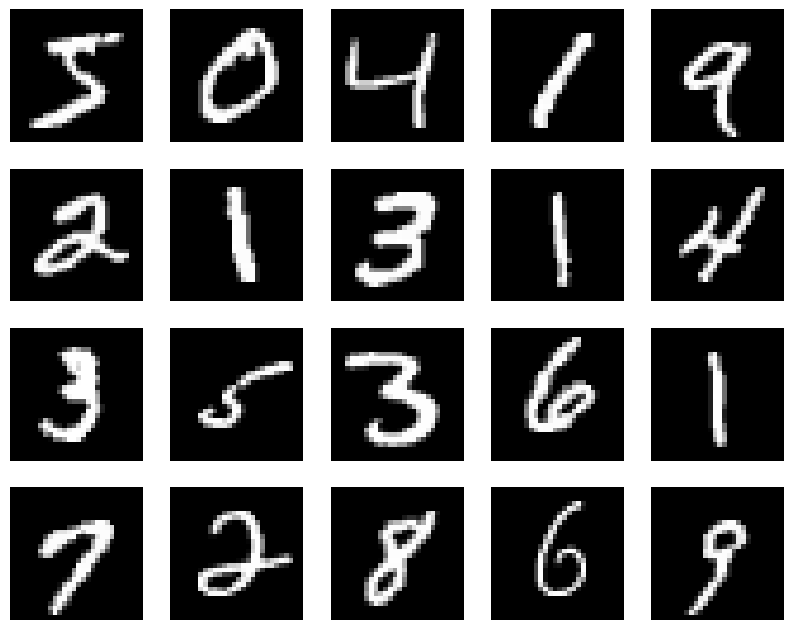

In [7]:
plt.figure(figsize=(10,10))
for n in range(20):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap="gray")
    plt.axis("off")

In [8]:
# Görsel ifadeleri daha rahat çağırmak için fonskiyon yazabiliriz

def visualize_img(data):
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(x_train[n], cmap="gray")
        plt.axis("off")

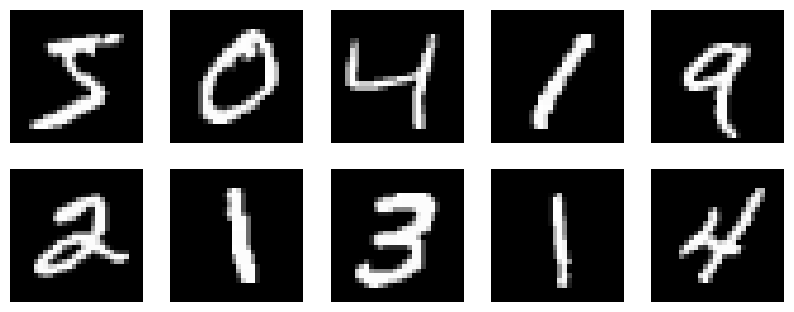

In [9]:
visualize_img(x_train)

In [10]:
x_train[2].shape

(28, 28)

In [11]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [12]:
x_train[2][14,10]

49

In [13]:
x_train[2].sum()

19443

In [14]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [15]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [16]:
def pixel_visualize(img):
    fig= plt.figure(figsize=(12,12))
    ax= fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    
    theshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                       color= "white" if img[x][y]< theshold else "black")

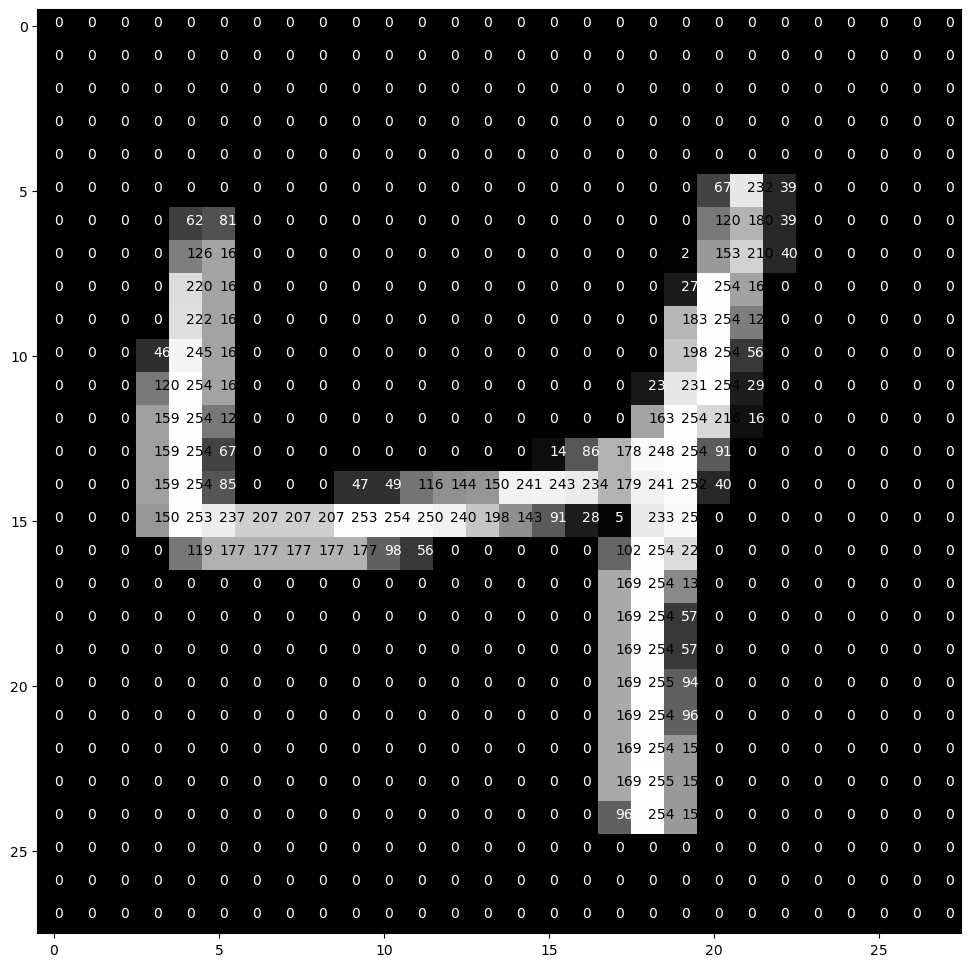

In [17]:
pixel_visualize(x_train[2])

# Veriyi Hazırlama (Data Prepation)

In [18]:
# Encoding

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
# Reshaping

In [22]:
image_size = x_train.shape[1]

In [23]:
image_size

28

In [24]:
print(f"x_train boyutu:{x_train.shape}")
print(f"x_test boyutu:{x_test.shape}")

x_train boyutu:(60000, 28, 28)
x_test boyutu:(10000, 28, 28)


In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu:{x_train.shape}")
print(f"x_test boyutu:{x_test.shape}")

x_train boyutu:(60000, 28, 28, 1)
x_test boyutu:(10000, 28, 28, 1)


In [26]:
# Normalizasyon

In [27]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Modelleme

In [28]:
# Sinir Ağı Mimarisi

In [29]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu", name= "layer1"),
    Dense(units=num_label, activation="softmax", name="output_layer")])


In [30]:
model.compile(loss="categorical_crossentropy",
             optimizer = "adam",
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5


469/469 [==============================] - 2s 2ms/step - loss: 0.3583 - precision: 0.9476 - recall: 0.8475 - accuracy: 0.9029 - val_loss: 0.1908 - val_precision: 0.9595 - val_recall: 0.9322 - val_accuracy: 0.9464
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1633 - precision: 0.9647 - recall: 0.9438 - accuracy: 0.9532 - val_loss: 0.1383 - val_precision: 0.9685 - val_recall: 0.9522 - val_accuracy: 0.9601
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1160 - precision: 0.9734 - recall: 0.9603 - accuracy: 0.9667 - val_loss: 0.1051 - val_precision: 0.9748 - val_recall: 0.9636 - val_accuracy: 0.9686
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - precision: 0.9785 - recall: 0.9688 - accuracy: 0.9736 - val_loss: 0.0942 - val_precision: 0.9768 - val_recall: 0.9676 - val_accuracy: 0.9718
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0719 - precision: 0.9833 - reca

# Model Başarısı Değerlendirme

In [33]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0595 - precision: 0.9859 - recall: 0.9797 - accuracy: 0.9826 - val_loss: 0.0795 - val_precision: 0.9790 - val_recall: 0.9730 - val_accuracy: 0.9753
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0498 - precision: 0.9884 - recall: 0.9833 - accuracy: 0.9856 - val_loss: 0.0771 - val_precision: 0.9794 - val_recall: 0.9744 - val_accuracy: 0.9760
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0417 - precision: 0.9904 - recall: 0.9865 - accuracy: 0.9885 - val_loss: 0.0734 - val_precision: 0.9804 - val_recall: 0.9753 - val_accuracy: 0.9774
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0352 - precision: 0.9918 - recall: 0.9886 - accuracy: 0.9901 - val_loss: 0.0653 - val_precision: 0.9823 - val_recall: 0.9784 - val_accuracy: 0.9798
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0300 - precision: 0.9931 - r

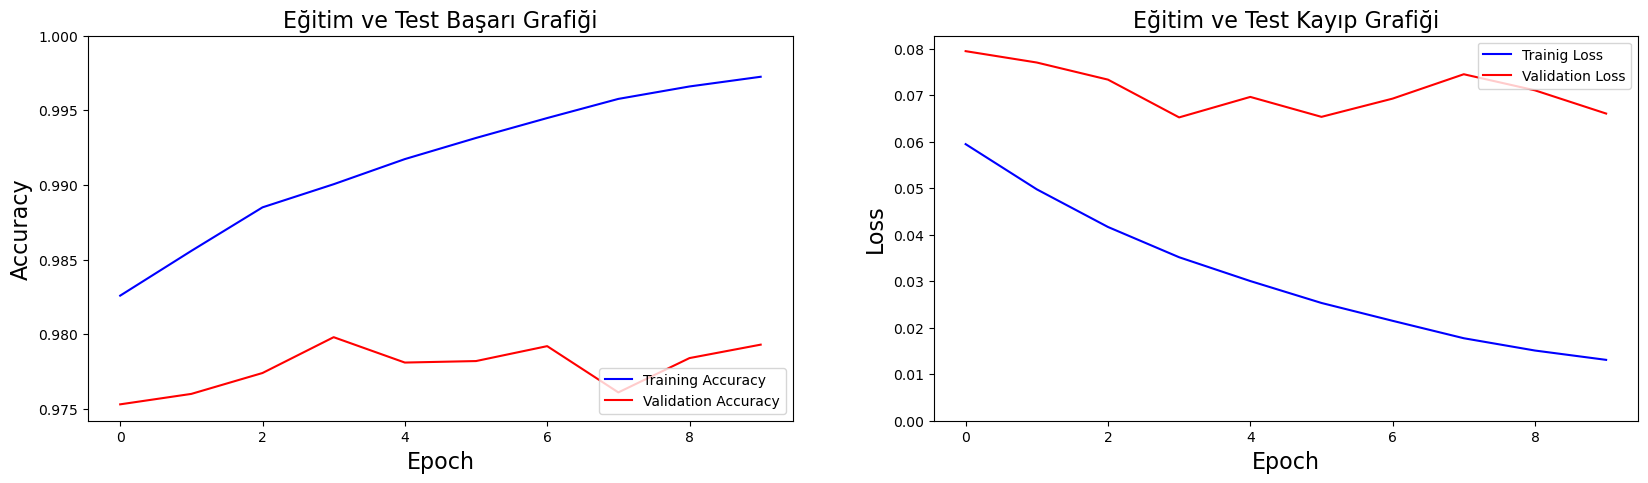

In [34]:
# Accuracy ve Loss Grafikleri
#---------------------------- Grafik 1 Accuracy------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label= "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Eğitim ve Test Başarı Grafiği", fontsize= 16)

#--------------------------- Grafik 2 Loss-----------------------------
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label= "Trainig Loss")
plt.plot(history.history["val_loss"], color="r", label= "Validation Loss")
plt.legend(loc = "upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize= 16)
plt.show()

In [35]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.lf%%" % (100.0 * acc))
print("\nTest Loss: %.lf%%" % (100.0 * loss))
print("\nTest Precision: %.lf%%" % (100.0 * precision))
print("\nTest Recall: %.lf%%" % (100.0 * recall))


Test Accuracy: 98%

Test Loss: 7%

Test Precision: 98%

Test Recall: 98%


# Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [36]:
model.save("mnist_model.h5")

In [37]:
import random

In [38]:
random = random.randint(0, x_test.shape[0])
random

5557

In [39]:
test_image = x_test[random]

In [40]:
y_test[random]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

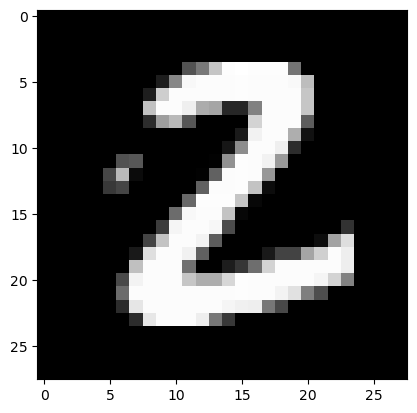

In [41]:
plt.imshow(test_image.reshape(28,28), cmap="gray")

In [42]:
test_data = x_test[random].reshape(1,28,28,1)

probability = model.predict(test_data)

probability

1/1 [==============================] - 0s 68ms/step


array([[8.0988723e-14, 1.3984560e-08, 9.9999988e-01, 8.0727879e-08,
        2.1165302e-24, 1.1574201e-13, 7.3310999e-17, 2.8514700e-18,
        3.0382665e-09, 1.2155457e-17]], dtype=float32)

In [43]:
predicted_classes = np.argmax(probability)

predicted_classes

2

In [44]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=1))[0]}\n")
print(f"Diğer Sınıfların Olasılık Değerleri:\n{probability}")

Tahmin Edilen Sınıf: 2 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999998807907104

Diğer Sınıfların Olasılık Değerleri:
[[8.0988723e-14 1.3984560e-08 9.9999988e-01 8.0727879e-08 2.1165302e-24
  1.1574201e-13 7.3310999e-17 2.8514700e-18 3.0382665e-09 1.2155457e-17]]
